In [9]:
%%time
# sentiment analysis----------------
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
import string
import draft

# start from (25/04/2018, 26/04/2018) as day1
# end date (01/05/2018, 02/05/2018) as last day

time_duration = [('25/04/2018','26/04/2018'),
                 ('26/04/2018','27/04/2018'),
                 ('27/04/2018','28/04/2018'),
                 ('28/04/2018','29/04/2018'), 
                 ('29/04/2018','30/04/2018'),
                 ('30/04/2018','01/05/2018'),
                 ('01/05/2018','02/05/2018'),
                 ('02/05/2018','03/05/2018')]

# test_tweet = draft.get_tweets_from_location_and_date('Sydney', '02/05/2018', '03/05/2018')
# print(len(test_tweet))

# tweets = draft.get_tweets_from_location_and_date('Melbourne', '01/05/2018', '2/05/2018')
# print(len(result))

def getTweetsByCity(city_name):
    day_count = 1
    day_tweets = {}
    for i in time_duration:
        day_tweets[day_count] = draft.get_tweets_from_location_and_date(city_name, i[0], i[1])
        day_count += 1
    return day_tweets
        
sydney_tweets = getTweetsByCity('Sydney')
melbourne_tweets = getTweetsByCity('Melbourne')
perth_tweets = getTweetsByCity('Perth')
brisbane_tweets = getTweetsByCity('Brisbane')
canberra_tweets = getTweetsByCity('Canberra')

CPU times: user 1min 8s, sys: 15.4 s, total: 1min 24s
Wall time: 7min 34s


In [10]:
# 34601
print(len(sydney_tweets[1]))

31206


In [11]:
import numpy as np
import re

punctuation = set(string.punctuation)
pattern = re.compile('(@)|(#)')

tb = Blobber(analyzer=NaiveBayesAnalyzer())

# input tweets within one day
def getSentimentScore(tweets):
    sentiment_score = []
    for i in tweets:
        # remove @ and # 
        tweet = re.sub(pattern,' ', i).strip()
        # remove http...
        tweet = ' '.join([i for i in tweet.split() if not i.startswith('http')])
        # remove puncutation
        tweet = ''.join([i for i in tweet if i not in punctuation])
        # print(tweet)
        # print(tb(tweet).sentiment.p_pos)
        sentiment_score.append(tb(tweet).sentiment.p_pos)
#     print(len(sentiment_score))
#     print(np.average(sentiment_score))
    return np.average(sentiment_score)

def getSentimentScoreByDay(city_tweets):
    tweet_score = []
    for k, v in city_tweets.items():
        score = getSentimentScore(v)
        tweet_score.append(score)

    return tweet_score


sydney_score = getSentimentScoreByDay(sydney_tweets)
melbourne_score = getSentimentScoreByDay(melbourne_tweets)
perth_score = getSentimentScoreByDay(perth_tweets)
brisbane_score = getSentimentScoreByDay(brisbane_tweets)
canberra_score = getSentimentScoreByDay(canberra_tweets)

In [12]:
print(sydney_score)
print(melbourne_score)
print(perth_score)
print(brisbane_score)
print(canberra_score)

[0.54729882546096797, 0.55562225177829605, 0.55434277818281641, 0.54796133487836152, 0.54782372396880707, 0.554845645460042, 0.55970741887157205, 0.56212108536321337]
[0.53967548968418155, 0.55091522227575951, 0.54828670345342534, 0.5425110457282486, 0.53987159459738088, 0.54896827781653401, 0.55302605901445745, 0.5600266744846828]
[0.53931504463328428, 0.54831467424061064, 0.54766086543921766, 0.54330956769063343, 0.54043737831310945, 0.54338523684932716, 0.55161234756409527, 0.55370927743023646]
[0.54587474889091958, 0.55772550712813906, 0.55741615868896899, 0.55073070481813657, 0.55065922922401134, 0.55746584073224248, 0.56109094172870999, 0.5658422751872052]
[0.57644307388673488, 0.58916784348340734, 0.57173502893115213, 0.56799447871326092, 0.56103888427900983, 0.58121564804864345, 0.59623354012220153, 0.59859101670838355]


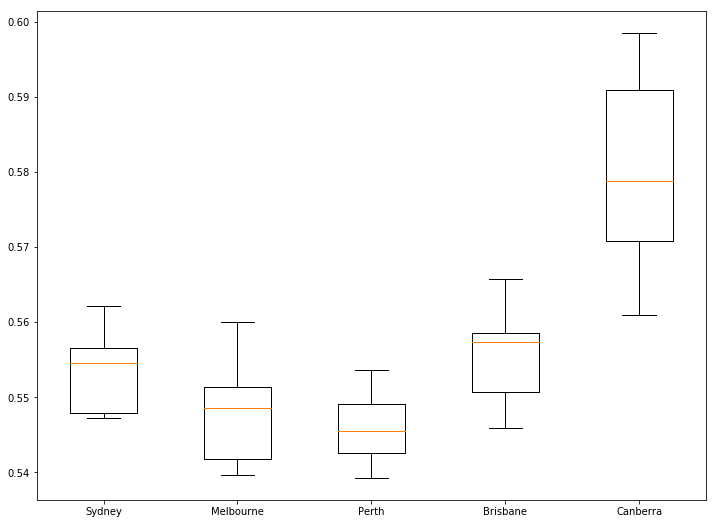

In [13]:
import matplotlib.pyplot as plt

data_to_plot = [sydney_score, melbourne_score, perth_score, brisbane_score, canberra_score]

# labels
labels = ['Sydney', 'Melbourne', 'Perth', 'Brisbane', 'Canberra']

# Create a figure instance
fig = plt.figure(1, figsize=(12, 9))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, labels=labels)

# Save the figure
# fig.savefig('fig1.png', bbox_inches='tight')
plt.show()
